In [23]:
import json

import matplotlib.pyplot as plt
import torch

In [24]:
base_path = "reports/FIMWindowed/SynthData_500k/8windows_25%overlap/MinMax_SavGol/"

predictions = torch.load(base_path + "predictions.pt")

In [25]:
print(predictions["times_target"].shape)
print(predictions.keys())

torch.Size([25000, 256, 1])
dict_keys(['sample_paths_target', 'sample_path_prediction', 'times_target', 'times_prediction', 'observation_times', 'observation_values', 'observation_mask'])


# Visualizations

In [26]:
# get 16 random samples
torch.manual_seed(42)
sample_ids = sorted(torch.randint(0, predictions["times_target"].size(0), (16,)))
sample_ids = [v.item() for v in sample_ids]
print(sample_ids)

[1067, 1924, 8954, 11876, 12113, 12542, 14014, 15026, 16378, 17210, 17572, 18620, 19950, 21414, 22335, 23231]


In [ ]:
def plot_sample(line_plot_data: dict, sample_id: int, ax):
    colors = ["teal", "gold", "green", "red", "teal", "gold", "green"]  # noqa: F841

    obs_mask = line_plot_data["observation_mask"][sample_id].bool()
    obs_times = line_plot_data["observation_times"][sample_id][~obs_mask]
    obs_values = line_plot_data["observation_values"][sample_id][~obs_mask]

    ax.scatter(obs_times, obs_values, color="black", marker="x", label="observed")
    ax.plot(
        line_plot_data["times_target"][sample_id],
        line_plot_data["sample_paths_target"][sample_id],
        color="black",
        linestyle="--",
        label="target",
    )

    ax.plot(line_plot_data["times_target"][sample_id], line_plot_data["sample_path_prediction"][sample_id], color="blue", label="learnt")

    # axs[0].legend()
    ax.set_title("{}".format(sample_id))
    ax.set_xlabel("Time")

    # remove spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

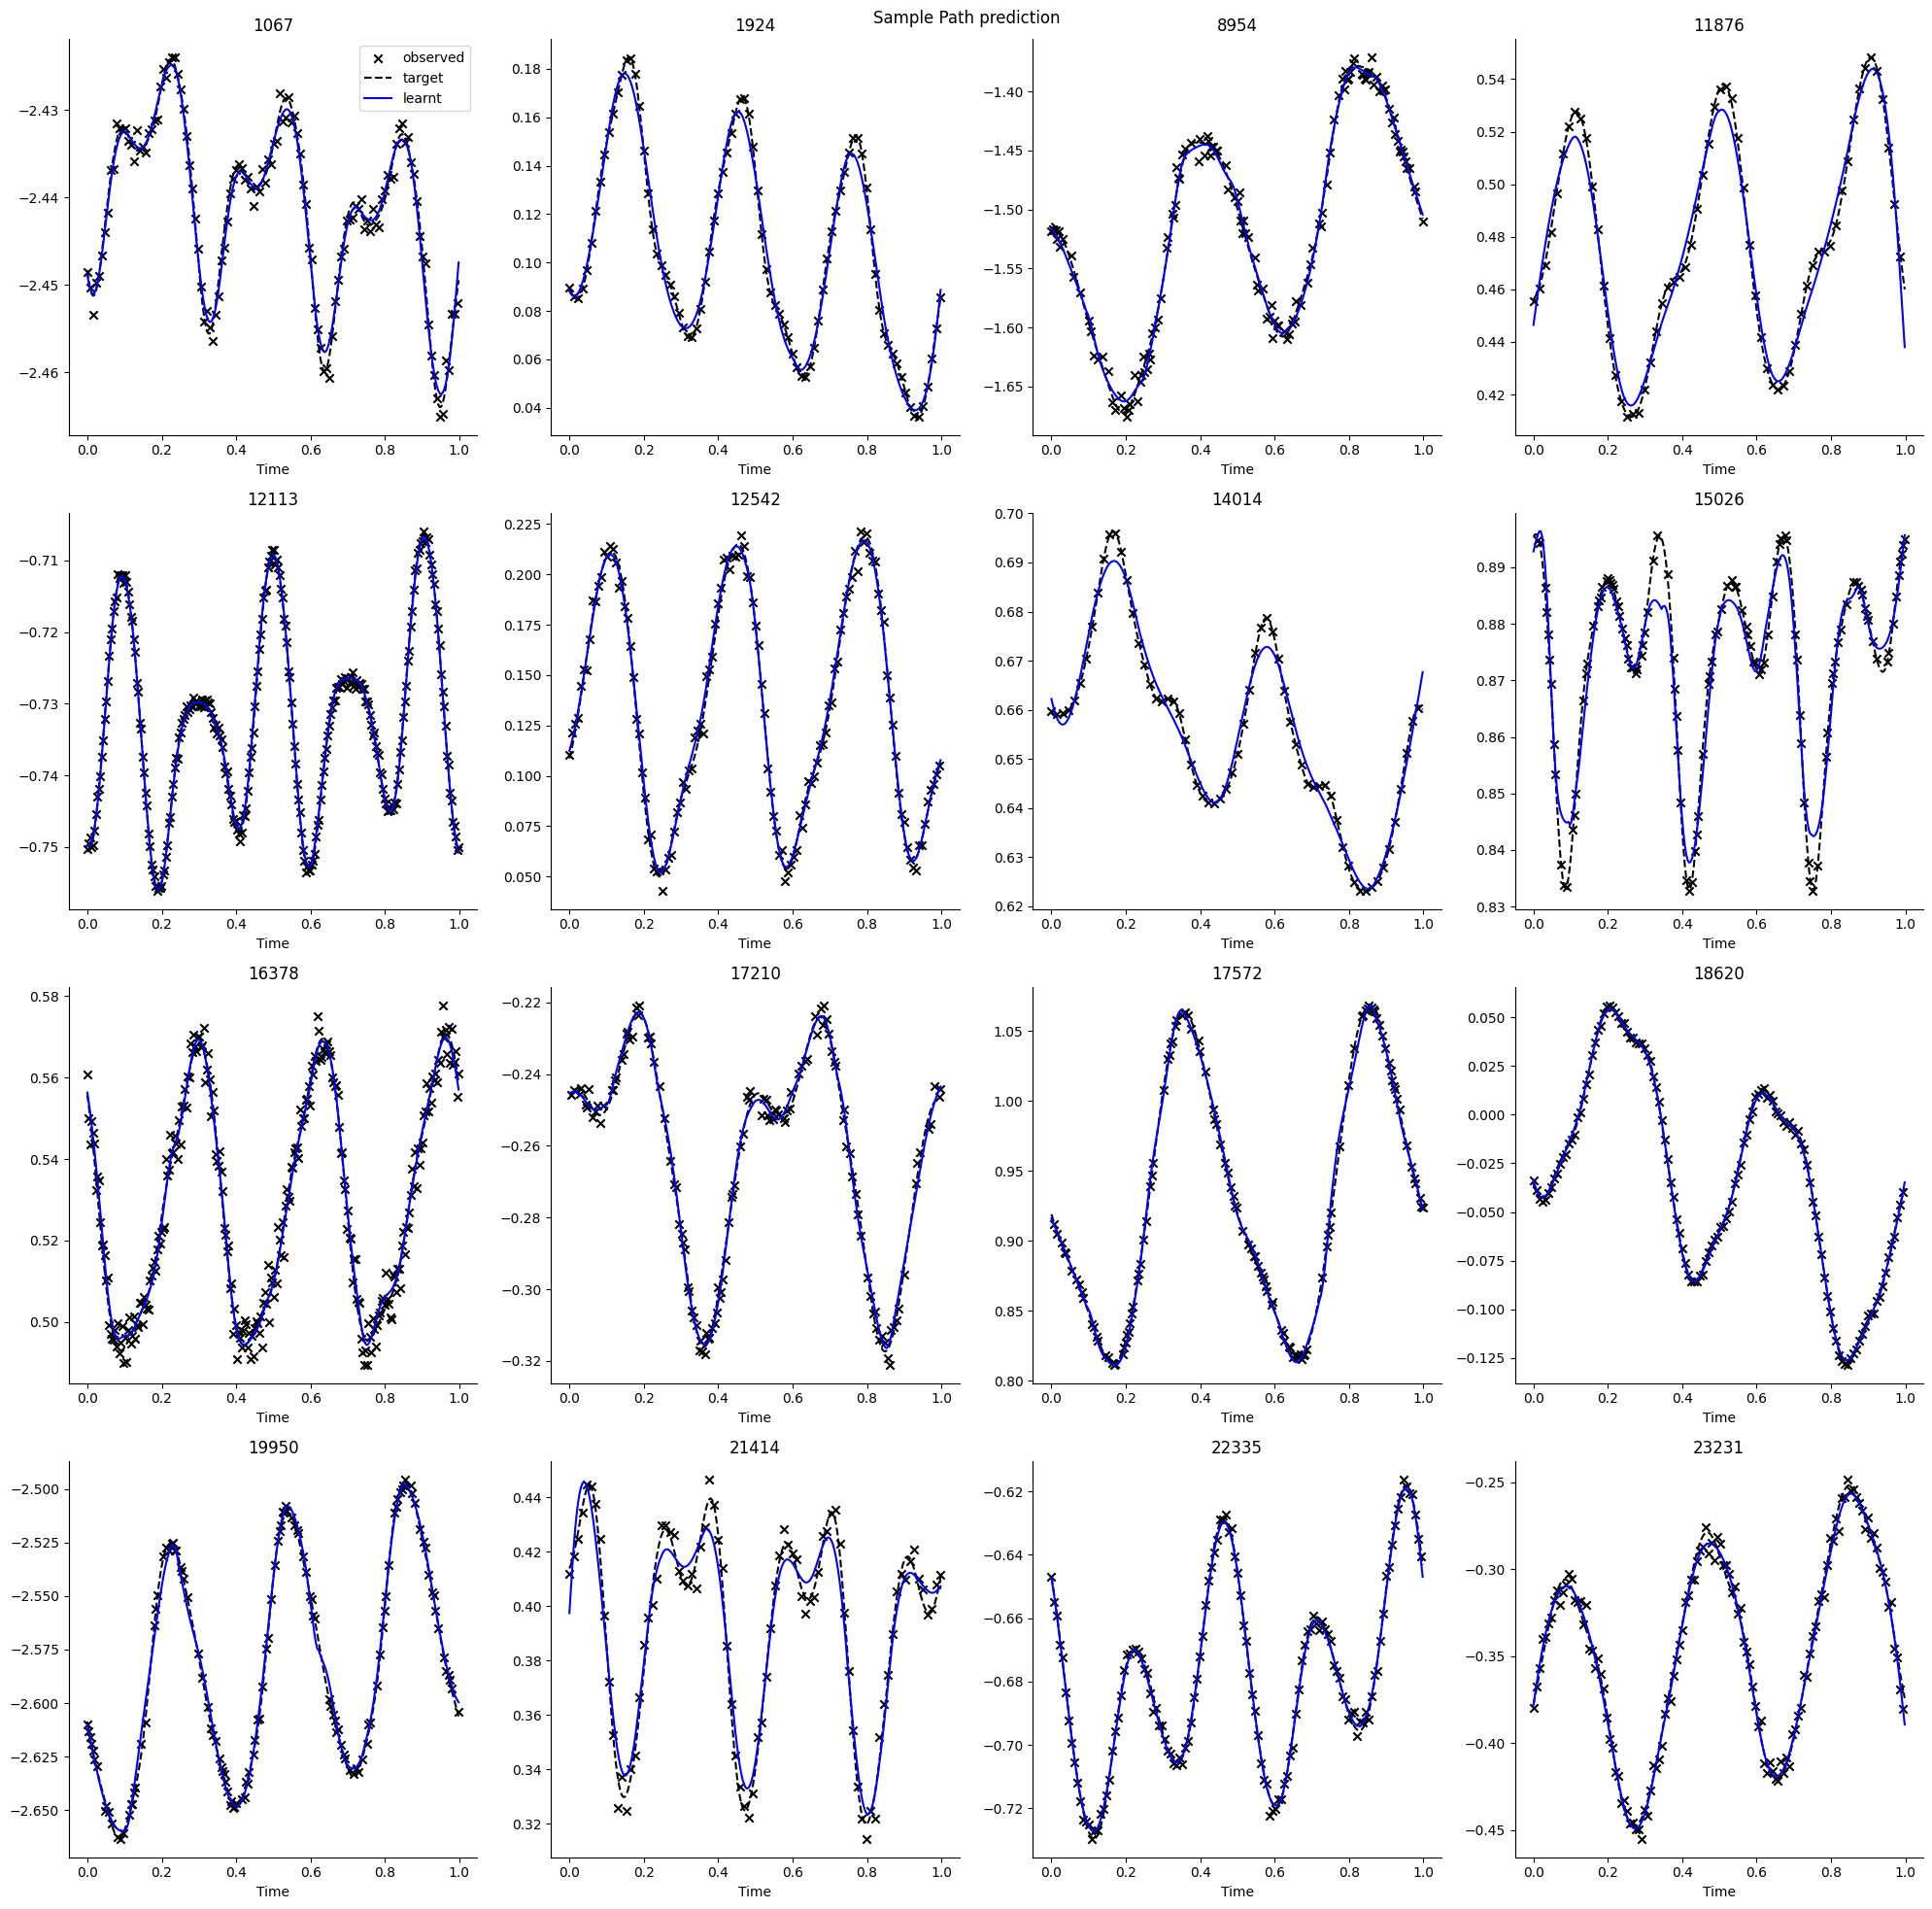

In [28]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for ax, sample_id in zip(axs.flatten(), sample_ids):
    plot_sample(predictions, sample_id, ax)
fig.suptitle("Sample Path prediction")
axs[0, 0].legend()
plt.tight_layout()
plt.savefig(base_path + "prediction.png")
plt.show()

# Metrics

In [29]:
metrics: dict = json.load(open(base_path + "metrics.json", "r"))
print(json.dumps(metrics, indent=2))

{
  "r2_score_mean": 0.9867355848182285,
  "r2_score_std": 0.029767688381314678,
  "r2_score_above0.9": 0.9822,
  "mae_mean": 0.0025010289565519776,
  "mae_std": 0.0016049083161652881,
  "mse_mean": 1.452049326611884e-05,
  "mse_std": 2.181093742164034e-05,
  "rmse_mean": 0.0032224120843116545,
  "rmse_std": 0.0020338925964182132
}
